In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
%matplotlib inline
import pandas as pd
from graspy import plot

In [47]:
data_dir = Path('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/data')
embed_dir = data_dir / 'embedding'

In [48]:
timestamp = 'T=319-11_24'
proj_mat_files = [f'fmri_gcca_projection_mat_{timestamp}.csv', f'sc_gcca_projection_mat_{timestamp}.csv', f'goa_gcca_projection_mat_{timestamp}.csv']

In [49]:
proj_mats = [np.genfromtxt(embed_dir / file, delimiter=',') for file in proj_mat_files]

In [52]:
for i in [0,1]:
    proj_mats[i] = proj_mats[i].T.reshape(-1,400,400)
    proj_mats[i] = (proj_mats[i] + np.transpose(proj_mats[i], (0,2,1)))/2
    proj_mats[i] = proj_mats[i].reshape(-1,160000)

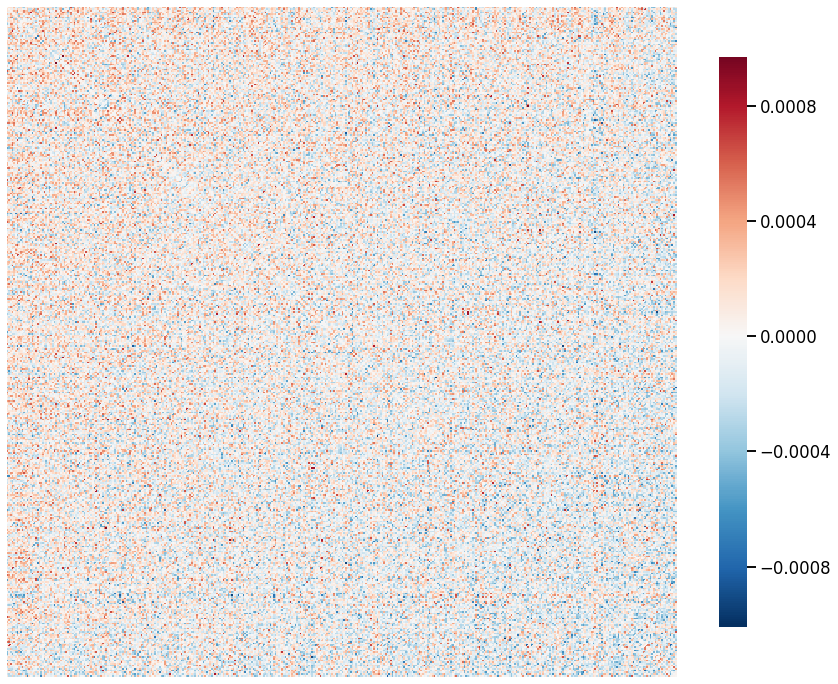

In [60]:
plot.heatmap(proj_mats[0][0,:].reshape(400,400), figsize=(15,15))

In [62]:
fmri0 = proj_mats[0][0,:].reshape(400,400)
nodes0_dist = np.sum(fmri0, axis=1)

(array([ 5., 15., 47., 85., 85., 81., 45., 19., 14.,  4.]),
 array([-0.02539827, -0.01988886, -0.01437946, -0.00887005, -0.00336065,
         0.00214876,  0.00765816,  0.01316757,  0.01867697,  0.02418638,
         0.02969578]),
 <a list of 10 Patch objects>)

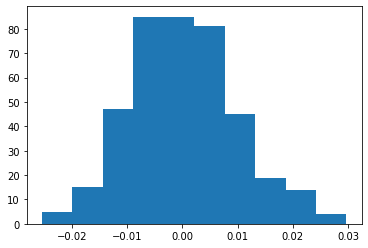

In [64]:
plt.hist(nodes0_dist)

In [69]:
proj_mats[2].shape

(26, 19)

(array([3., 5., 5., 6., 3., 0., 3., 0., 0., 1.]),
 array([-0.2682837 , -0.18573963, -0.10319556, -0.02065149,  0.06189258,
         0.14443665,  0.22698072,  0.30952479,  0.39206886,  0.47461293,
         0.557157  ]),
 <a list of 10 Patch objects>)

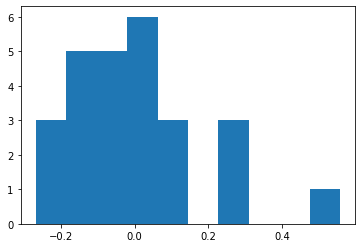

In [71]:
plt.hist(proj_mats[2][:,0])